In [1]:
# import arnie
# import matplotlib.pyplot as plt
# from arnie.bpps import bpps
# import numpy as np
# import pandas as pd
# from pathlib import Path
# import os
# from tqdm import tqdm
# import torch
# import random
# def matrix_to_three_columns_np(bpp_matrix):
#     pos_1, pos_2 = np.nonzero(bpp_matrix)
#     probabilities = bpp_matrix[pos_1, pos_2]
#     result = np.column_stack((pos_1 + 1, pos_2 + 1, probabilities))
#     return result.astype('float16')

# def get_bpp(sequnce, package):
#     return bpps(sequnce, package=package)


# def save_bpp(row, save_dir, package):
#     name = save_dir/f"{row.sequence_id}.npy"
#     bpp = get_bpp(row.sequence, package)
#     np.save(name, matrix_to_three_columns_np(bpp))
    
# pkg_name = "contrafold_2" #"vienna_2" #
# path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
# save_dir = path/f'bpp/{pkg_name}/'
# os.makedirs(save_dir, exist_ok=True)
# df = pd.read_parquet(path/'train_ss_vienna_rna.parquet')[['sequence_id', 'sequence']]
# df

# for i in tqdm(range(df.shape[0])):
#     save_bpp(df.iloc[i], save_dir, pkg_name)

In [2]:
from PIL import Image
import random

In [3]:
import arnie
import matplotlib.pyplot as plt
from arnie.bpps import bpps
import numpy as np
import pandas as pd
from pathlib import Path
import os
from tqdm import tqdm
import torch
from joblib import Parallel, delayed

def matrix_to_three_columns_np(bpp_matrix):
    pos_1, pos_2 = np.nonzero(bpp_matrix)
    probabilities = bpp_matrix[pos_1, pos_2]
    result = np.column_stack((pos_1 + 1, pos_2 + 1, probabilities))
    return result.astype('float16')


def matrix_to_three_columns_np(bpp_matrix):
    pos_1, pos_2 = np.nonzero(bpp_matrix)
    probabilities = bpp_matrix[pos_1, pos_2]
    
    # Make sure positions fit into uint8 by checking their max values
    if np.max(pos_1) > 255 or np.max(pos_2) > 255:
        raise ValueError("Position values exceed uint8 limits!")

    # Create an empty structured array with desired data types for each column
    dt = np.dtype([('pos_1', 'uint8'), ('pos_2', 'uint8'), ('probabilities', 'float16')])
    result = np.zeros(len(pos_1), dtype=dt)
    
    # Fill the structured array with values
    result['pos_1'] = pos_1 + 1
    result['pos_2'] = pos_2 + 1
    result['probabilities'] = probabilities
    
    return result

def get_bpp(sequnce, package):
    return bpps(sequnce, package=package)

def save_bpp(row, save_dir, package):
    name = save_dir/f"{row.sequence_id}.npy"
    bpp = get_bpp(row.sequence, package)
    np.save(name, matrix_to_three_columns_np(bpp))

names = []
def save_png(row, save_dir, package):
    name = save_dir/f"{row.sequence_id}.png"
    try:
        bpp = get_bpp(row.sequence, package)
        Image.fromarray((bpp* 255).astype('uint8')).save(name)
    except:
        names.append(name)
        
    
pkg_name = "vienna_2" 
path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
save_dir = path/f'bpp/{pkg_name}/'
os.makedirs(save_dir, exist_ok=True)
df = pd.read_parquet(path/'train_ss_vienna_rna.parquet')[['sequence_id', 'sequence']]
df["L"] = df['sequence'].map(len)
df.sort_values(by='L',ascending=False, inplace=True)

# Using joblib to parallelize the tasks
results = Parallel(n_jobs=-1)(delayed(save_png)(row, save_dir, pkg_name) for _, row in tqdm(df.iterrows(), total=df.shape[0]))
print(names)

/home/exx/.conda/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 13%|█▎        | 106656/806573 [02:27<17:48, 655.22it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 15%|█▍        | 120480/806573 [02:48<17:28, 654.57it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 15%|█▌        | 124128/806573 [02:54<16:59, 669.32it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 16%|█▋        | 131616/806573 [03:05<17:18, 650.15it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 17%|█▋        | 136800/806573 [03:13<16:56, 658.77it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 19%|█▊        | 150816/806573 [03:35<16:28, 663.36it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 19%|█▉        | 151776/806573 [03:36<16:38, 655.74it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 19%|█▉        | 155424/806573 [03:42<16:22, 662.68it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'
b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 20%|█▉        | 159264/806573 [03:47<16:25, 656.87it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 20%|██        | 162144/806573 [03:52<16:25, 653.76it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 22%|██▏       | 177312/806573 [04:14<16:06, 651.17it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 23%|██▎       | 188640/806573 [04:31<15:38, 658.31it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 23%|██▎       | 189216/806573 [04:32<15:48, 651.17it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 24%|██▎       | 191328/806573 [04:35<15:37, 656.57it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\nWARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 24%|██▍       | 196704/806573 [04:43<15:19, 663.59it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 27%|██▋       | 215328/806573 [05:11<14:42, 670.20it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 29%|██▊       | 230304/806573 [05:32<13:01, 737.45it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 29%|██▉       | 232224/806573 [05:34<13:03, 733.12it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 30%|███       | 243360/806573 [05:50<12:42, 738.90it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 30%|███       | 243744/806573 [05:50<12:36, 744.31it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 32%|███▏      | 260448/806573 [06:14<13:21, 681.16it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 34%|███▍      | 276576/806573 [06:38<13:09, 671.48it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 45%|████▍     | 361440/806573 [08:38<10:05, 734.58it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 50%|█████     | 404832/806573 [09:41<10:56, 611.81it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 50%|█████     | 405408/806573 [09:42<10:54, 613.40it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 50%|█████     | 406752/806573 [09:44<11:11, 595.30it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 51%|█████     | 407328/806573 [09:45<10:48, 615.33it/s]

b'WARNING: ...from traverse_loop. Loop 3 has crossed regions\n'


 55%|█████▍    | 442272/806573 [10:42<09:55, 611.53it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 56%|█████▌    | 450144/806573 [10:55<09:35, 618.89it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 60%|██████    | 485856/806573 [11:53<08:34, 623.94it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 65%|██████▍   | 523872/806573 [12:51<06:56, 678.89it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 67%|██████▋   | 544224/806573 [13:21<07:04, 617.41it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 68%|██████▊   | 545184/806573 [13:23<06:55, 628.87it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 68%|██████▊   | 545760/806573 [13:24<07:03, 615.22it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 74%|███████▍  | 599904/806573 [14:48<05:10, 666.22it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 78%|███████▊  | 631776/806573 [15:36<04:22, 665.27it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 79%|███████▊  | 633696/806573 [15:39<04:24, 653.74it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 81%|████████  | 650400/806573 [16:04<03:57, 658.32it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 85%|████████▌ | 688032/806573 [17:02<03:01, 653.06it/s]

b'WARNING: ...from traverse_loop. Loop 6 has crossed regions\n'


 86%|████████▌ | 693024/806573 [17:10<03:05, 613.10it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 87%|████████▋ | 705696/806573 [17:30<02:44, 613.74it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 90%|████████▉ | 722592/806573 [17:57<02:17, 612.14it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 90%|█████████ | 726816/806573 [18:04<02:09, 613.95it/s]

b'WARNING: ...from traverse_loop. Loop 2 has crossed regions\n'


 98%|█████████▊| 790368/806573 [19:44<00:23, 697.75it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


 99%|█████████▉| 800160/806573 [19:58<00:09, 700.87it/s]

b'WARNING: ...from traverse_loop. Loop 1 has crossed regions\n'


100%|██████████| 806573/806573 [20:04<00:00, 669.37it/s] 


[]


In [ ]:
#!ls {save_dir}
#7f9ec577ec91.npy


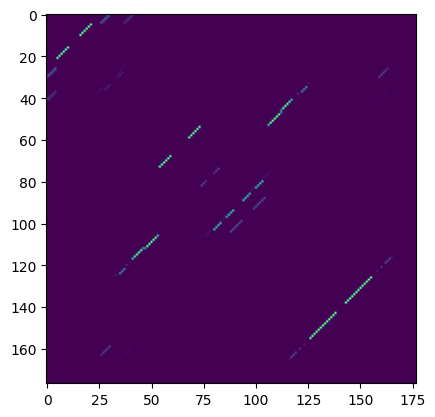

In [8]:
plt.imshow(np.array(Image.open(random.choice(list(save_dir.glob('*.png')))))/255.)

In [ ]:
len(list(save_dir.glob('*.png'))) == df.shape[0]

In [ ]:
 - df.shape[0]

In [5]:
len(set(pd.read_parquet(path/'test_ss_vienna_rna.parquet')['sequence_id'].to_list() + pd.read_parquet(path/'train_ss_vienna_rna.parquet')['sequence_id'].to_list())) - len(list(save_dir.glob('*.png')))

8